In [721]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [722]:
df = pd.read_csv('three.csv')
df.head()

,make,model,city,price,year,km,type,cc,mode
0,Toyota,Vitz,Karachi,26.30,2018,"26,000",Petrol,1000,Automatic
1,Toyota,Vitz,Lahore,21.50,2014,"115,000",Petrol,1000,Automatic
2,Toyota,Prado,Lahore,1.34,2012,"84,000",Petrol,2700,Automatic
3,Toyota,Vitz,Karachi,NaN,2014,"71,863",Petrol,1000,Automatic
4,Toyota,Fortuner,Karachi,63.00,2016,"74,110",Petrol,2700,Automatic


In [723]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(100)

,make,model,city,price,year,km,type,cc,mode
89,Toyota,Vitz,Multan,26.00,2018,"30,000",Petrol,1000,Automatic
1870,Suzuki,Cultus,Islamabad,6.20,2003,"75,000",CNG,1000,Manual
1663,Suzuki,Cultus,Karachi,12.55,2016,"70,000",Petrol,1000,Manual
979,Toyota,Prado,Islamabad,79.00,2007,"74,000",Petrol,2700,Automatic
1347,Suzuki,Alto,Islamabad,10.00,2012,"77,000",Petrol,1000,Manual
...,...,...,...,...,...,...,...,...,...
375,Toyota,Land,Karachi,4.55,2018,"14,000",Petrol,4608,Automatic
1458,Suzuki,Swift,Islamabad,12.78,2011,"115,000",Petrol,1300,Manual
235,Toyota,Corolla,Karachi,37.75,2018,"47,000",Petrol,1800,Automatic
1308,Suzuki,Alto,Lahore,14.20,2021,1,Petrol,660,Manual


# Data analysis & Feature engineering

- Drop useless columns
- Drop duplicates
- Check null values & address them
- Check if any empty values, Drop them
- Check dtypes & convert into numeric if not
- Encoding
- Outliers removal
- Multi-collinearity
- Scaling
- Splitting

# Useless Columns

In [724]:
# No useless columns

# Drop duplicates

In [725]:
# df.drop_duplicates(inplace=True)

# Null values

<AxesSubplot:>

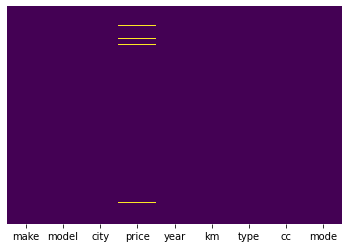

In [726]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [727]:
df.dropna(axis=0,inplace=True)

In [728]:
df.isnull().sum()

make     0
model    0
city     0
price    0
year     0
km       0
type     0
cc       0
mode     0
dtype: int64

# Dtypes

In [729]:
df.dtypes

make      object
model     object
city      object
price    float64
year       int64
km        object
type      object
cc         int64
mode      object
dtype: object

In [730]:
# KM
df.km = df.km.str.replace(',', '')

In [731]:
df['km'] = pd.to_numeric(df['km'])

# Outliers removal

In [732]:
df['zscore'] = ( df.price - df.price.mean() ) / df.price.std()
df.shape

(2887, 10)

In [733]:
df_no_outliers = df[(df.zscore>-1) & (df.zscore<1)]
df_no_outliers.head()

,make,model,city,price,year,km,type,cc,mode,zscore
89,Toyota,Vitz,Multan,26.00,2018,30000,Petrol,1000,Automatic,0.241443
1663,Suzuki,Cultus,Karachi,12.55,2016,70000,Petrol,1000,Manual,-0.643131
1347,Suzuki,Alto,Islamabad,10.00,2012,77000,Petrol,1000,Manual,-0.810838
958,Toyota,Corolla,Karachi,28.50,2017,60000,Petrol,1600,Automatic,0.405862
1935,Suzuki,Swift,Sargodha,15.60,2012,128000,Petrol,1300,Automatic,-0.442540


In [734]:
df_no_outliers.drop('zscore', inplace=True,axis=1)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [735]:
df_no_outliers.shape

(2173, 9)

# Split

In [736]:
X = df_no_outliers.drop(['price'],axis=1)
y = df_no_outliers.price

In [737]:
X

,make,model,city,year,km,type,cc,mode
89,Toyota,Vitz,Multan,2018,30000,Petrol,1000,Automatic
1663,Suzuki,Cultus,Karachi,2016,70000,Petrol,1000,Manual
1347,Suzuki,Alto,Islamabad,2012,77000,Petrol,1000,Manual
958,Toyota,Corolla,Karachi,2017,60000,Petrol,1600,Automatic
1935,Suzuki,Swift,Sargodha,2012,128000,Petrol,1300,Automatic
...,...,...,...,...,...,...,...,...
1145,Suzuki,Swift,Islamabad,2014,160000,Petrol,1300,Automatic
1199,Suzuki,Wagon,Rawalpindi,2017,53000,Petrol,1000,Manual
371,Toyota,Corolla,Islamabad,2014,165000,Petrol,1300,Manual
795,Toyota,Corolla,Abbottabad,2013,200000,Petrol,1300,Manual


In [738]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Encoding

In [739]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [740]:
ohe=OneHotEncoder()
ohe.fit(X[['make','model','city','type','mode']])

OneHotEncoder()

In [741]:
# ohe.categories_

In [742]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['make','model','city','type','mode']),
                                    remainder='passthrough')

# Model building

In [743]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

linear = LinearRegression()

lasso_with = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_without = Lasso()

ridge_with = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_without = Ridge()

dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=7)
knn = KNeighborsRegressor(n_neighbors=1)

In [744]:
pipe=make_pipeline(column_trans,rf)

In [745]:
pipe.fit(X_train,y_train)
print()

# Evaluation

In [746]:
pipe.score(X_train,y_train)

0.9855917504614647

In [747]:
pipe.score(X_test,y_test)

0.9370220425242786

In [748]:
X_test[15:20]

,make,model,city,year,km,type,cc,mode
517,Toyota,Passo,Lahore,2015,75000,Petrol,1000,Automatic
2403,Honda,City,Lahore,2013,79192,Petrol,1300,Manual
582,Toyota,Aqua,Islamabad,2015,83000,Hybrid,1500,Automatic
2540,Honda,City,Islamabad,2019,14500,Petrol,1500,Automatic
2106,Honda,City,Islamabad,2019,23920,Petrol,1500,Automatic


In [749]:
y_test[15:20]

517     20.50
2403    19.50
582     28.50
2540    28.35
2106    29.50
Name: price, dtype: float64

In [750]:
pipe.predict(pd.DataFrame(columns=['make','model','city','year','km','type','cc','mode'],data=np.array(['Suzuki','Every','Gujranwala',2021,108000,'Petrol',660,'Manual']).reshape(1,8)))

array([16.64285714])

# Conclusion

- Linear : 88/84
- Lasso with: 30/34
- Lasso  : 62/65
- Ridge with : 7/7
- Ridge : 30/35
- decision : 99/89
- Random : 98/92
- KNN : 99/43

# Exporting

In [751]:
import pickle
pickle.dump(pipe,open('RandomForest.pkl','wb'))

In [752]:
address = open("RandomForest.pkl", "rb")
model = pickle.load(address)

In [753]:
model.predict(pd.DataFrame(columns=['make','model','city','year','km','type','cc','mode'],data=np.array(['Suzuki','Mehran','Karachi',1995,10000,'Petrol',800,'Manual']).reshape(1,8)))

array([10.02142857])